In [42]:
# Create augmentations with original data
import csv

# File path with measurements 
file_path_G1R1 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-21-2025_G1_R1.csv'
file_path_G1R2 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-21-2025_G1_R2.csv'
file_path_G1R3 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-21-2025_G1_R3.csv'
file_path_G2R1 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-24-2025_G2_R1.csv'
file_path_G2R2 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-25-2025_G2_R2.csv'
file_path_G2R3 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-26-2025_G2_R3.csv'

def read_data(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        n = 0
        data = []
        for i,row in enumerate(reader):
            data.append(row)
    return data

data_G1R1 = read_data(file_path_G1R1)
data_G1R2 = read_data(file_path_G1R2)
data_G1R3 = read_data(file_path_G1R3)
data_G2R1 = read_data(file_path_G2R1)
data_G2R2 = read_data(file_path_G2R2)
data_G2R3 = read_data(file_path_G2R3)

In [72]:
# Poner todas las fuentes de datos en una lista
all_data_sources = [data_G1R1, data_G1R2, data_G1R3, data_G2R1, data_G2R2, data_G2R3]

# Iterar sobre cada 'source' en 'all_data_sources',
# luego sobre cada 'item' en 'source',
# y añadir 'item' a la lista si 'item[1]' es '0'.
data = [item for source in all_data_sources for item in source if item[1] == '150']
#data1 = [item for source in all_data_sources for item in source if item[1] == '100']
print(len(data))

19


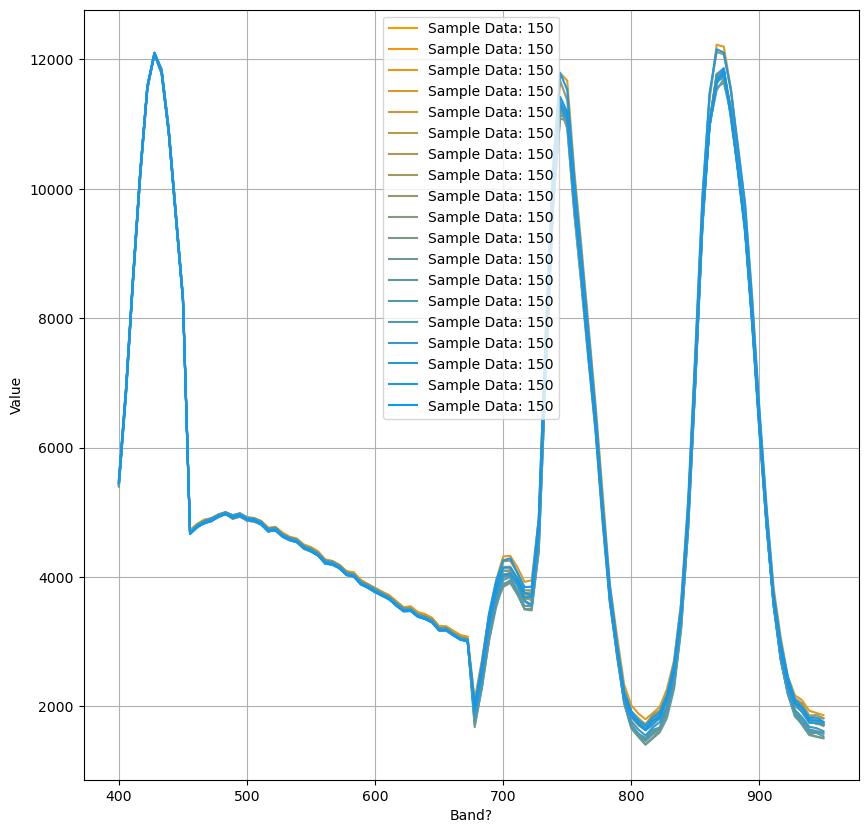

In [73]:
import matplotlib.pyplot as plt
import numpy as np

y_data = []
for i,y_i in enumerate(data): 
    y_row = []
    #print(len(y_i))
    for j in y_i[3:]:
        #print(j)
        if j != '-':
            y_row.append(float(j))
    y_data.append(y_row)

# y_data1 = []
# for i,y_i in enumerate(data1): 
#     y_row = []
#     #print(len(y_i))
#     for j in y_i[3:]:
#         #print(j)
#         if j != '-':
#             y_row.append(float(j))
#     y_data1.append(y_row)
    
x_data = np.linspace(400,950,len(y_data[0]))
#print(len(x_data))

plt.figure(figsize=(10, 10))
prev_cc = y_data[0][1]
b_color = 0.0
r_color = 1.0
for i in range(len(data)):
#for i in range(3):
    cc = data[i][1]
    curr_cc = y_data[i][1]
    if prev_cc != curr_cc:
        b_color = 0.0 + (i/len(data))
        r_color = 1.0 - (i/len(data))
    plt.plot(x_data,y_data[i], label='Sample Data: '+ str(cc), color=(r_color,0.6,b_color))
    prev_cc = curr_cc

# for i in range(len(data1)):
# #for i in range(3):
#     cc = data1[i][1]
#     curr_cc = y_data1[i][1]
#     if prev_cc != curr_cc:
#         g_color = 0.0 + (i/len(data1))
#         r_color = 1.0 - (i/len(data1))
#     plt.plot(x_data,y_data1[i], label='Sample Data: '+ str(cc), color=(r_color,g_color,0.6))
#     prev_cc = curr_cc

plt.xlabel('Band?')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

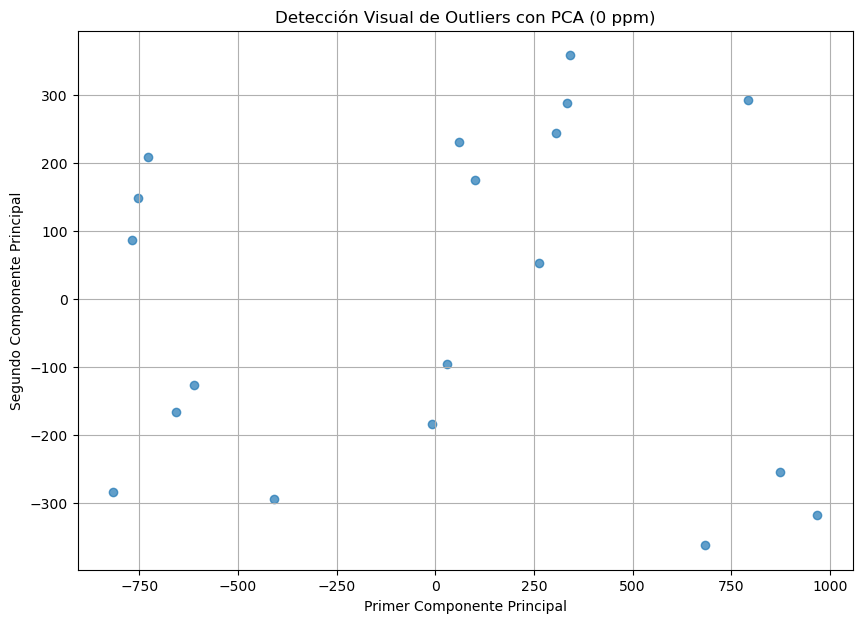

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Configurar y aplicar PCA directamente sobre y_data
# (Asumiendo que y_data ya está cargado y tiene la forma correcta)
pca = PCA(n_components=2)
y_data_pca = pca.fit_transform(y_data)

# 2. Graficar los resultados
plt.figure(figsize=(10, 7))
# Graficamos los nuevos datos transformados (y_data_pca)
plt.scatter(y_data_pca[:, 0], y_data_pca[:, 1], alpha=0.7)
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Detección Visual de Outliers con PCA (0 ppm)')
plt.grid(True)
plt.show()

#

In [64]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Asumiendo que y_data es tu matriz (n_mediciones, 100 bandas)

# 1. Configurar el modelo
# 'contamination=0.05' asume que ~5% de tus datos son outliers.
# Puedes ajustar este valor (ej. 0.02 si son muy pocos) o dejarlo en 'auto'.
clf = IsolationForest(contamination=0.05, random_state=42)

# 2. Entrenar y predecir
# Devuelve '1' para puntos normales (inliers) y '-1' para outliers
preds = clf.fit_predict(y_data)

# 3. Obtener los índices de los outliers
outlier_indices = np.where(preds == -1)[0]

print(f"Total de mediciones: {len(y_data)}")
print(f"Índices de outliers encontrados: {outlier_indices}")
print(data[17])

Total de mediciones: 19
Índices de outliers encontrados: [6]
['Oct26_G2_R3', '100', '---', '5420.0', '6857.0', '8617.0', '10239.0', '11559.0', '12074.0', '11810.0', '10911.0', '9613.0', '8316.0', '4674.0', '4790.0', '4850.0', '4892.0', '4957.0', '4989.0', '4934.0', '4976.0', '4911.0', '4892.0', '4846.0', '4730.0', '4749.0', '4637.0', '4586.0', '4563.0', '4452.0', '4420.0', '4350.0', '4234.0', '4211.0', '4155.0', '4058.0', '4030.0', '3901.0', '3854.0', '3789.0', '3734.0', '3674.0', '3576.0', '3493.0', '3498.0', '3396.0', '3372.0', '3312.0', '3187.0', '3187.0', '3104.0', '3034.0', '3011.0', '-', '1934.0', '2538.0', '3303.0', '3779.0', '4152.0', '4135.0', '3970.0', '3743.0', '3694.0', '4655.0', '7510.0', '9919.0', '11511.0', '11169.0', '9919.0', '8750.0', '7527.0', '6362.0', '4939.0', '3650.0', '2850.0', '2200.0', '1823.0', '1711.0', '1636.0', '1760.0', '1836.0', '2080.0', '2512.0', '3392.0', '4886.0', '7118.0', '9448.0', '11022.0', '11680.0', '11871.0', '11138.0', '10404.0', '9439.0', '7